In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
import tensorflow_addons as tfa

C:\Users\Magda\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
df = pd.read_csv(r"C:\Users\Magda\Documents\sy\archive (2)\HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#Get dimensions of data
df.shape

(506, 14)

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.fillna(df.mean())

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df.shape) # training examples, #features+label

(506, 14)


In [9]:
print('Boston housing dataset has {} data points with {} variables each'.format(df.shape[0],df.shape[1]))

Boston housing dataset has 506 data points with 14 variables each


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

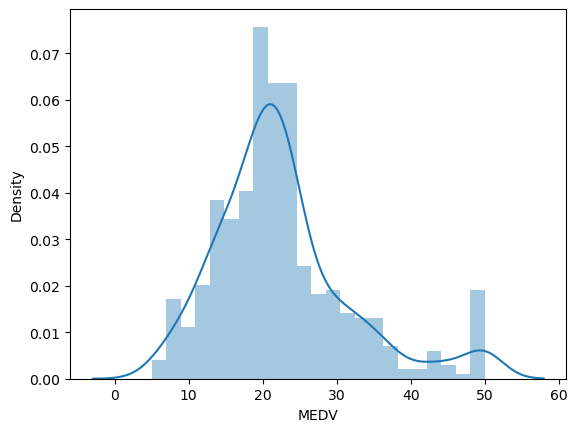

In [10]:
sns.distplot(df['MEDV'])

# Is there a correlation between a decrease in crime rate and an increase in price?

Text(0.5, 1.0, 'Crime rate vs owner-home value')

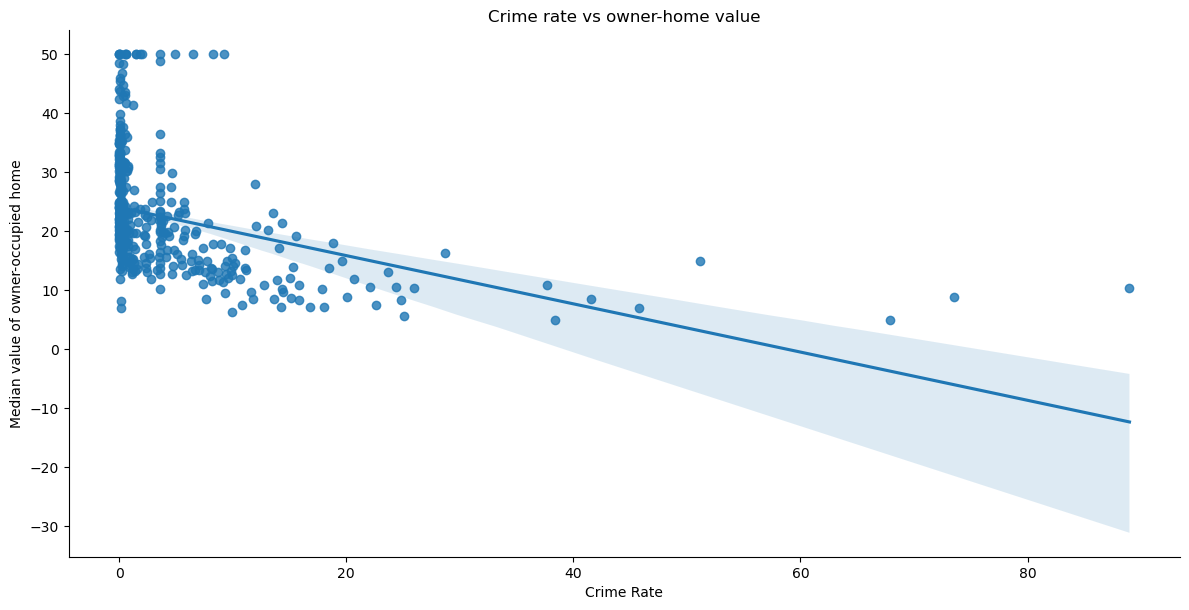

In [11]:
sns.lmplot(x='CRIM',y='MEDV',data=df,aspect=2,height=6)
plt.xlabel('Crime Rate')
plt.ylabel('Median value of owner-occupied home')
plt.title('Crime rate vs owner-home value')

It appears that there may be a positive relationship between decreasing crime rates and increasing home prices. This suggests that the safety of a neighborhood may be a contributing factor in determining the price of an owned home.

# Is there a correlation between the level of NOX (nitric oxide concentration) and the price of a home?

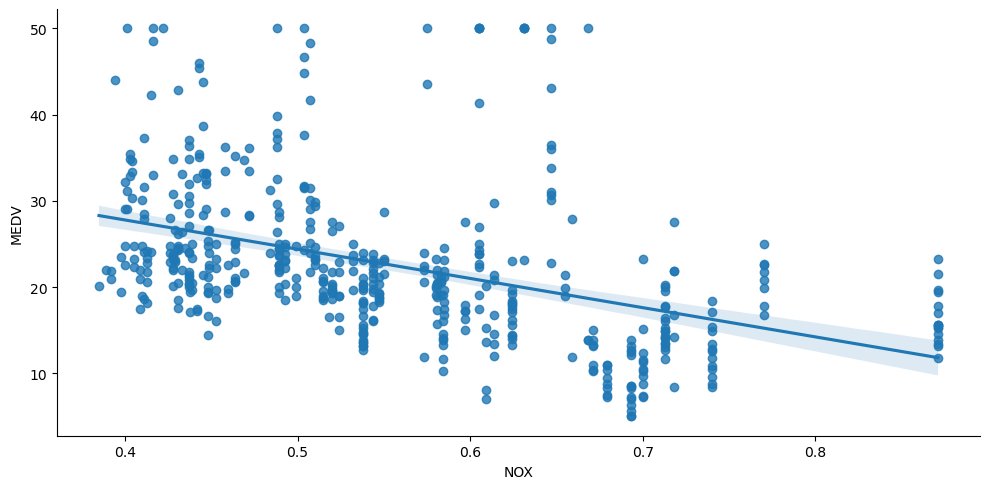

In [12]:
sns.lmplot(x='NOX', y='MEDV', data=df, aspect=2)

There appears to be a negative relationship between nitric oxide concentration and home prices, meaning that as the concentration of nitric oxide increases, the price of a home may decrease. This could be due to the harmful effects of excessive nitric oxide on the human body, making it less desirable for people to live near areas with high NOX levels and subsequently decreasing the value of homes in those areas.

# Split the data into label (medV - Price) and features

In [13]:
Y = df['MEDV'] #price 

X = df.drop(['MEDV'], axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Statistical analysis

In [15]:
minimum_price = np.min(Y)
maximum_price = np.max(Y)

mean_price = Y.mean()
median_price = Y.median()
print("minimum_price ",minimum_price,"maximum_price ", maximum_price," mean_price ",mean_price,"median_price ",median_price)

minimum_price  5.0 maximum_price  50.0  mean_price  22.532806324110698 median_price  21.2


# Show the correlation between variables

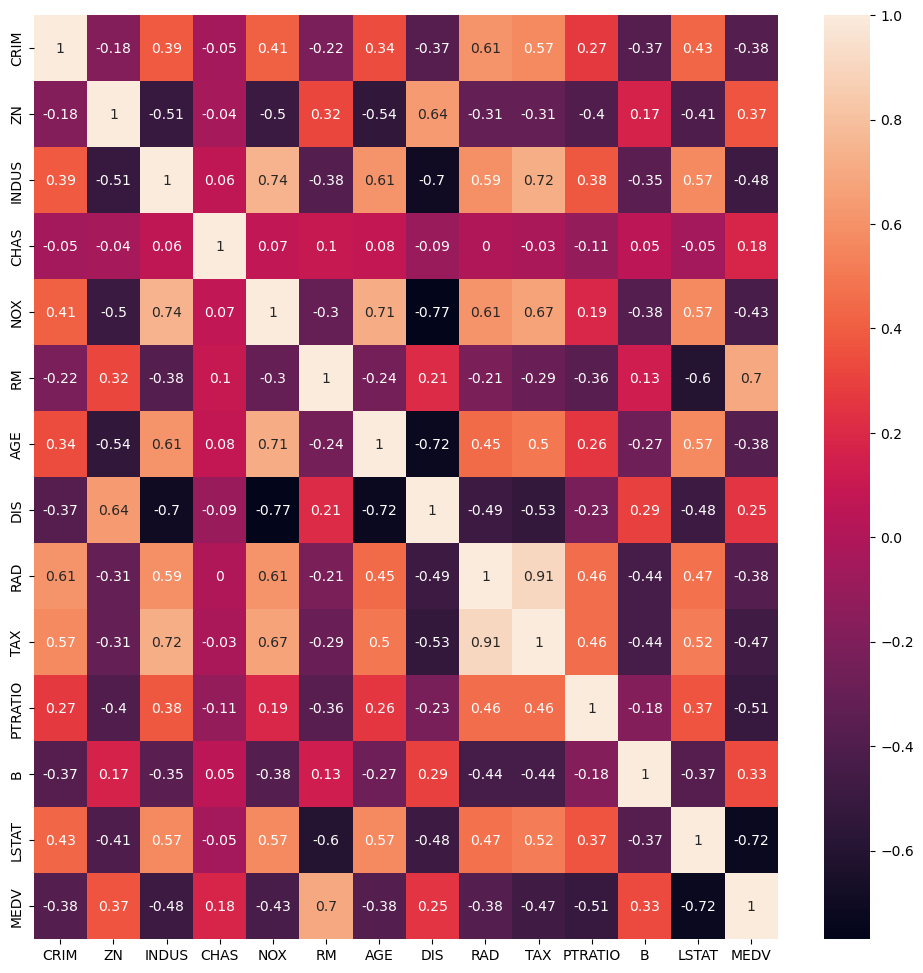

In [16]:
cor = df.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(data=cor,annot=True) #sns: seaborn
plt.show()
#The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point.

The choice of features is either done by correlation or completely by intuition.

'RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [17]:
X_new=X[['RM','LSTAT','PTRATIO']]
X_new

,RM,LSTAT,PTRATIO
0,6.575,4.980000,15.3
1,6.421,9.140000,17.8
2,7.185,4.030000,17.8
3,6.998,2.940000,18.7
4,7.147,12.715432,18.7
...,...,...,...
501,6.593,12.715432,21.0
502,6.120,9.080000,21.0
503,6.976,5.640000,21.0
504,6.794,6.480000,21.0


# Visualize the three most important features with a plot.

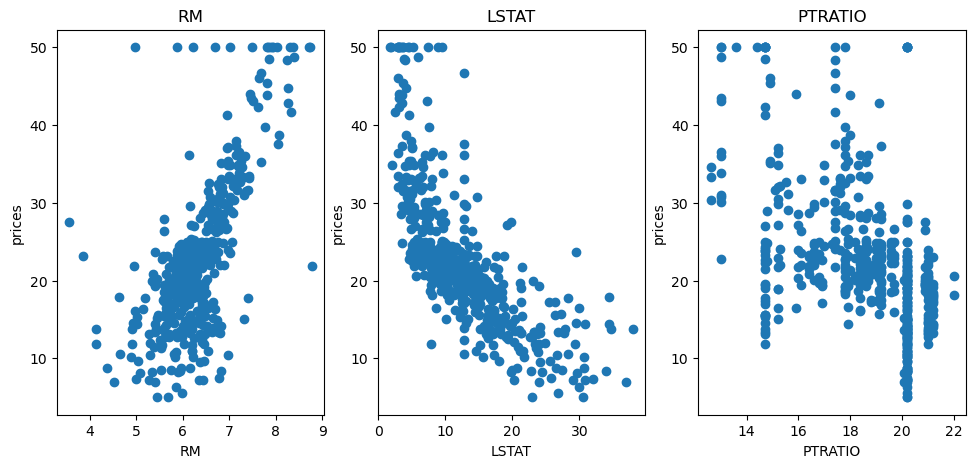

In [18]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(X_new.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 5, i+1)
    x = X_new[col] # extract the feature
    plt.plot(x, Y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

# We split 80% of the data to the training set while 20% of the data to test set 

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Rescaling variables

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# LinearRegression

import LinearRegression class, instantiate it, and call the fit() method along with our training data to train.

In [21]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train) #training

LinearRegression()

# Use our test data and see how accurately our algorithm predicts the percentage score

In [22]:
y_pred = regr.predict(X_test)

In [23]:
train_score_lr = regr.score(X_train, Y_train)*100
test_score_lr = regr.score(X_test, Y_test)*100
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 72.71916265566591
The test score for lr model is 73.13302802551162


In [24]:
#we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model, which was implemented by a concept called r2_score.
#It is a function inside sklearn. metrics module, where the value of r2_score varies between 0 and 100 percent.
#we can say that it is closely related to MSE.
#The Scikit-Learn library comes with pre-built functions that can be used
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,y_pred)
print('r2 socre = ',score*100)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  73.13302802551162
mean_sqrd_error is=  21.03519176253896
root_mean_squared error=  4.586413823734069


# Now compare the actual output values for X_test with the predicted values

In [25]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
226,37.6,32.417012
292,27.9,31.453543
90,22.6,27.535446
373,13.8,5.959093
273,35.2,35.930077
...,...,...
349,26.6,18.987207
212,22.4,23.289751
156,13.1,12.616699
480,23.0,23.444331


# Create a bar char for visualisation of results "LinearRegression"

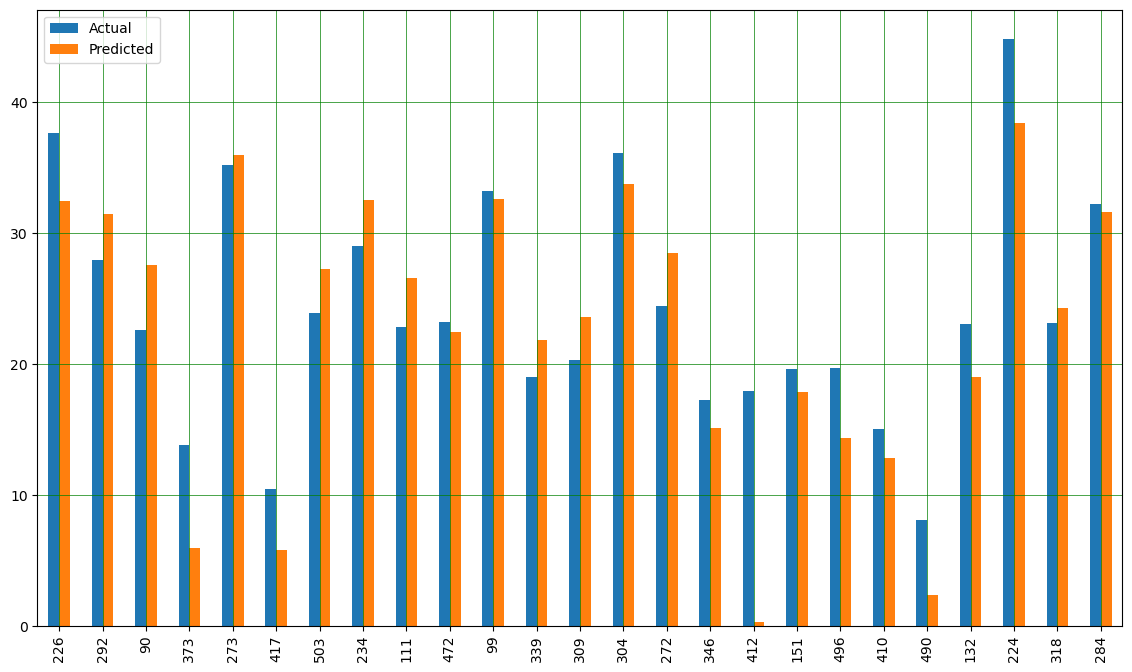

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

# SVR

In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [28]:
prediction = regressor.predict(X_test)
# check the accuracy on the training set
print(regressor.score(X_train, Y_train)*100)
print(regressor.score(X_test, Y_test)*100)

65.59813198465166
69.62249135329493


In [29]:
# predicting the accuracy score
score=r2_score(Y_test,prediction)
print('r2 socre = ',score*100)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,prediction))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,prediction)))

r2 socre =  69.62249135329493
mean_sqrd_error is=  23.78372673550216
root_mean_squared error=  4.876856234860954


# Now compare the actual output values for X_test with the predicted values

In [30]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})
df

,Actual,Predicted
226,37.6,31.523336
292,27.9,26.548522
90,22.6,25.674429
373,13.8,11.867013
273,35.2,28.941061
...,...,...
349,26.6,24.289127
212,22.4,22.599065
156,13.1,17.935727
480,23.0,21.578816


# RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [32]:
rf_pred = rf_reg.predict(X_test)

In [33]:
train_score_rf = regr.score(X_train, Y_train)*100
test_score_rf = regr.score(X_test, Y_test)*100

print("The train score for lr model is {}".format(train_score_rf))
print("The test score for lr model is {}".format(test_score_rf))

The train score for lr model is 72.71916265566591
The test score for lr model is 73.13302802551162


In [34]:
# predicting the accuracy score
score=r2_score(Y_test,rf_pred)
print('r2 socre = ',score*100)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,rf_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,rf_pred)))

r2 socre =  88.64344659499305
mean_sqrd_error is=  8.891485012254908
root_mean_squared error=  2.9818593213387694


# Now compare the actual output values for X_test with the predicted values

In [35]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_pred})
df

,Actual,Predicted
226,37.6,42.4977
292,27.9,27.9442
90,22.6,22.9601
373,13.8,11.6253
273,35.2,42.5892
...,...,...
349,26.6,28.0637
212,22.4,20.3137
156,13.1,15.6451
480,23.0,20.8470


# Create a bar char for visualisation of results  "RandomForestRegressor"

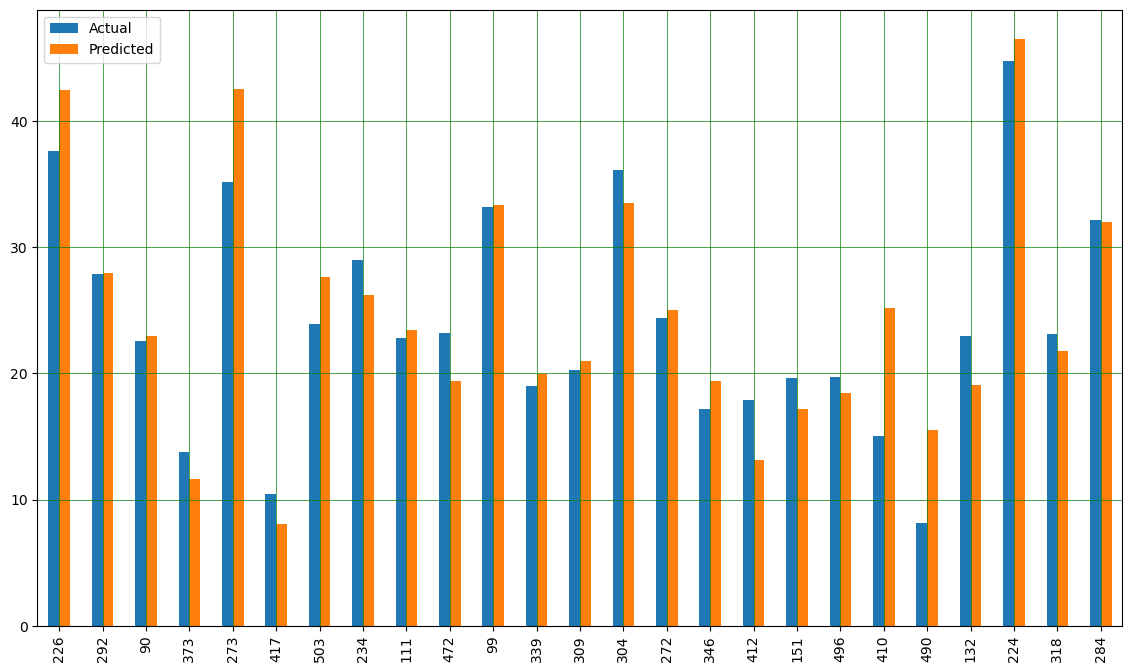

In [36]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()

# Define the neural network architecture

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model

In [38]:
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError(), tfa.metrics.RSquare()])

# Train the model

In [39]:
history = model.fit(X_train, Y_train, epochs=188, batch_size=32, 
                    validation_data=(X_test, Y_test), verbose=1)

Epoch 1/188
13/13 [==============================] - 1s 22ms/step - loss: 587.7571 - mean_absolute_error: 22.3746 - r_square: -5.8422 - val_loss: 536.8963 - val_mean_absolute_error: 21.3584 - val_r_square: -5.8575
Epoch 2/188
13/13 [==============================] - 0s 5ms/step - loss: 553.8368 - mean_absolute_error: 21.5945 - r_square: -5.4473 - val_loss: 500.2751 - val_mean_absolute_error: 20.4587 - val_r_square: -5.3897
Epoch 3/188
13/13 [==============================] - 0s 5ms/step - loss: 512.8774 - mean_absolute_error: 20.6062 - r_square: -4.9705 - val_loss: 454.3539 - val_mean_absolute_error: 19.2769 - val_r_square: -4.8032
Epoch 4/188
13/13 [==============================] - 0s 5ms/step - loss: 459.9952 - mean_absolute_error: 19.3057 - r_square: -4.3549 - val_loss: 396.1023 - val_mean_absolute_error: 17.6792 - val_r_square: -4.0592
Epoch 5/188
13/13 [==============================] - 0s 5ms/step - loss: 392.0676 - mean_absolute_error: 17.5062 - r_square: -3.5641 - val_loss: 32

# Evaluate the model on test data

In [40]:
test_loss, test_mae, test_r2 = model.evaluate(X_test, Y_test, verbose=0)
print('Test Mean Absolute Error:', test_mae)
print('Test R-squared:', test_r2*100)

Test Mean Absolute Error: 2.014984369277954
Test R-squared: 90.27575254440308


# Plot the training and validation loss

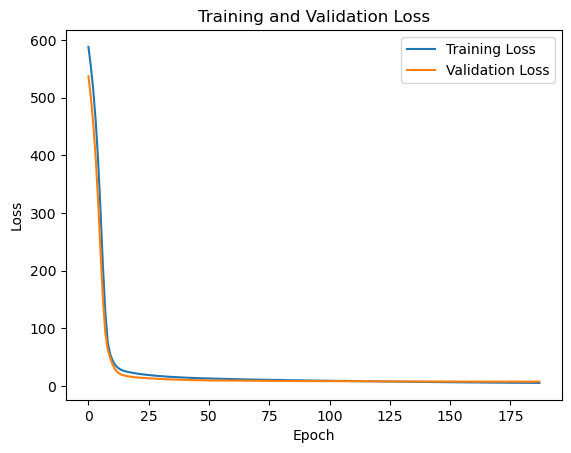

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()